「drug150.csv」を読み込んで、その人に最適な薬の種類を予測するモデルを作成しましょう。

●目的変数：薬の種類

●説明変数：  
ID,年齢,性別,血圧,コレステロール値,Na/Pbレーション値

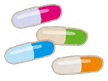

In [2]:
# pandasのライブラリ
import pandas as pd
# 機械学習ライブラリ
import sklearn
import numpy as np

In [4]:
# データの読み込み
df = pd.read_csv("drug150.csv", encoding = "shift-jis")

# 先頭10行を表示する
df.head(10)

,ID,年齢,性別,血圧値,コレステロール値,Na/Pbレーション値,薬の種類
0,100001,23,F,HIGH,HIGH,25.355,DrugY
1,100002,47,M,LOW,HIGH,13.093,drugC
2,100003,47,M,LOW,HIGH,10.114,drugC
3,100004,28,F,NORMAL,HIGH,7.798,drugX
4,100005,61,F,LOW,HIGH,18.043,DrugY
5,100006,22,F,NORMAL,HIGH,8.607,drugX
6,100007,49,F,NORMAL,HIGH,16.275,DrugY
7,100008,41,M,LOW,HIGH,11.037,drugC
8,100009,60,M,NORMAL,HIGH,15.171,DrugY
9,100010,43,M,LOW,NORMAL,19.368,DrugY


In [8]:
# 読み込んだデータの行数、列数を表示する
print("読み込んだデータの行数、列数：", df.shape)

# データ内の欠損値の数を表示する
print("読み込んだデータ全体の欠損値数：", df.isnull().sum().sum())

読み込んだデータの行数、列数： (150, 7)
読み込んだデータ全体の欠損値数： 0


In [10]:
# '性別','血圧値','コレステロール値'のデータをすべて One-Hot Encoding し、drug_dummy という新しいDataFrameに格納する
# ヒント：['カラム名']で取得するとSeries型、[['カラム名']]で取得するとDataFrame型です！！！！
drug_dummy = pd.get_dummies(df.loc[:, ["性別", "血圧値", "コレステロール値"]], prefix = ["性別", "血糖値", "コレステロール値"])

# drug_dummy の先頭から5行を表示
drug_dummy

,性別_F,性別_M,血糖値_HIGH,血糖値_LOW,血糖値_NORMAL,コレステロール値_HIGH,コレステロール値_NORMAL
0,1,0,1,0,0,1,0
1,0,1,0,1,0,1,0
2,0,1,0,1,0,1,0
3,1,0,0,0,1,1,0
4,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...
145,0,1,0,0,1,1,0
146,1,0,0,1,0,0,1
147,1,0,1,0,0,0,1
148,1,0,0,1,0,0,1


In [14]:
# drug_dummy の行数、列数を表示する
drug_dummy.shape

(150, 7)

In [15]:
# ヒント！！！ダミー変数はこんな風に作りましたよね…
# ['カラム名']は、Series型、[['カラム名']]で取得するとDataFrame型！！！！
df2 = df[['性別','血圧値','コレステロール値']]
drug_dummy2 = pd.get_dummies(df2)
drug_dummy2.head()

,性別_F,性別_M,血圧値_HIGH,血圧値_LOW,血圧値_NORMAL,コレステロール値_HIGH,コレステロール値_NORMAL
0,1,0,1,0,0,1,0
1,0,1,0,1,0,1,0
2,0,1,0,1,0,1,0
3,1,0,0,0,1,1,0
4,1,0,0,1,0,1,0


In [16]:
# df2 に'ID','Na/Pbレーション値'の列のみ代入する
df2 = df.loc[:, ["ID", "Na/Pbレーション値"]]

# df2の先頭データ5行を表示
df2.head()

,ID,Na/Pbレーション値
0,100001,25.355
1,100002,13.093
2,100003,10.114
3,100004,7.798
4,100005,18.043


In [17]:
# ダミー変数化した drug_dummy と、df2 を結合して、X という変数に代入する
X = pd.concat([drug_dummy, df2], axis = 1)

# X の先頭5行を表示
X.head()

,性別_F,性別_M,血糖値_HIGH,血糖値_LOW,血糖値_NORMAL,コレステロール値_HIGH,コレステロール値_NORMAL,ID,Na/Pbレーション値
0,1,0,1,0,0,1,0,100001,25.355
1,0,1,0,1,0,1,0,100002,13.093
2,0,1,0,1,0,1,0,100003,10.114
3,1,0,0,0,1,1,0,100004,7.798
4,1,0,0,1,0,1,0,100005,18.043


In [18]:
# yに目的変数の列（薬の種類）を代入する
y = df.iloc[:, -1]

# yのデータを先頭から5行表示する
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: 薬の種類, dtype: object

In [57]:
# SVMのライブラリの読み込み
from sklearn.svm import LinearSVC # 分類
from sklearn.linear_model import LinearRegression # 回帰

# 学習データとテストデータを分けるライブラリの読み込み
from sklearn.model_selection import train_test_split

In [64]:
# 学習データとテストデータに分割する
# test_size = 0.3 ,random_state = 15 とすること
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [65]:
# モデルの初期化（インスタンス化）を行う
model = LinearSVC()

# 学習データで学習を行う
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [70]:
# 学習データの正解率の出力
print('正解率(学習データ):', model.score(X_train, y_train))
print('正解率(学習データ): {:.3f}'.format(model.score(X_train, y_train)))

正解率(学習データ): 0.6666666666666666
正解率(学習データ): 0.667


In [67]:
# テストデータで予測を行う
result = model.predict(X_test)

In [68]:
# 予測結果を表示する
print(result)

['DrugY' 'drugX' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX'
 'DrugY' 'drugX' 'DrugY' 'drugX' 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX'
 'drugX' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'DrugY' 'drugX'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugX']


さて、予測精度を上げていきましょう！